You work in XYZ Corporation as a Machine Learning Engineer. The corporation wants you to build a system that can predict the salary of an employee based on the experience of the employee in number of years.

In [1]:
# 1.	Load the dataset using pandas.
import pandas as pd
import numpy as np
import sklearn

In [2]:
df= pd.read_csv("salary.csv")

In [3]:
df.head(31)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [6]:
# 2.	Separate Dataset into training and testing sets
# X is input variables and Y is output Variables
X=df.loc[:,["YearsExperience"]]
Y=df.loc[:,["Salary"]]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 

In [8]:
x_train.shape, y_train.shape

((24, 1), (24, 1))

In [9]:
x_test.shape, y_test.shape

((6, 1), (6, 1))

In [10]:
# 3.	Train a model to make predictions based on number of years as experience.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [11]:
lr.fit(x_train, y_train) #training of the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lr.coef_

array([[9354.58529193]])

In [13]:
lr.intercept_

array([25561.27783019])

In [14]:
y_pred = lr.predict(x_test)

In [15]:
y_pred

array([[ 53625.03370599],
       [102268.87722404],
       [ 80753.33105259],
       [ 52689.5751768 ],
       [ 60173.24341034],
       [106946.16987   ]])

In [16]:
#4.	Plot and visualize the training data
plt.plot(x_train.reset_index(drop=True))

NameError: name 'plt' is not defined

In [ ]:
#4.	Plot and visualize the testing data
plt.plot(x_test.reset_index(drop=True))


Bad key text.latex.preview in file C:\Users\Acer\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Acer\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Acer\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably

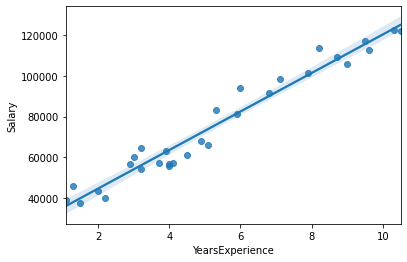

In [17]:
# regression line
import seaborn as sns
sns.regplot(x="YearsExperience", y="Salary", data=df);

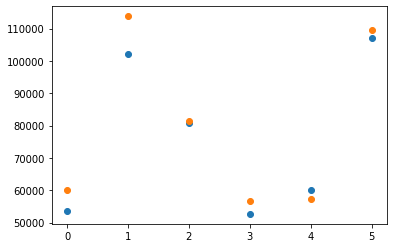

In [18]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_pred)), y_pred) # scatter plot not a good idea inside go for line graph
plt.scatter(range(len(y_test)), y_test)

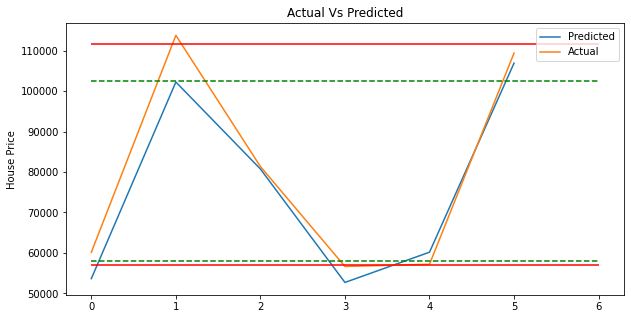

In [19]:
plt.figure(figsize=(10,5))
plt.title("Actual Vs Predicted")
plt.plot(y_pred, label="Predicted")
plt.plot(y_test.reset_index(drop=True),label="Actual")
plt.ylabel("House Price")
plt.legend()
plt.hlines(y=np.percentile(y_test, 25),xmin=0, xmax=6, colors="green", linestyles="dashed") # 25th percentile
plt.hlines(y=np.percentile(y_test, 75),xmin=0, xmax=6, colors="green", linestyles="dashed") # 75th percentile
plt.hlines(y=np.percentile(y_test, 10),xmin=0, xmax=6, colors="red", linestyles="solid") # outliers
plt.hlines(y=np.percentile(y_test, 90),xmin=0, xmax=6, colors="red", linestyles="solid") # outliers

In [20]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
MSE

34482052.71243171

In [21]:
RMSE = mean_squared_error(y_test,y_pred)**0.5
RMSE

5872.142088917102

In [22]:
# 5.	Check the model accuracy using the R2 score of the model


In [23]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9403926663190331